In [ ]:
!pip install fredapi

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf
import requests
from fredapi import Fred


start_date = datetime(2020,1,1)
end_date = datetime(2024,3,31)

### Preparing the data

In [ ]:
df = yf.download('NFLX',start_date ,end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,,
2020-01-02,329.809998,329.809998,329.980011,324.779999,326.100006,4485800
2020-01-03,325.899994,325.899994,329.859985,325.529999,326.779999,3806900
2020-01-06,335.829987,335.829987,336.359985,321.200012,323.119995,5663100
2020-01-07,330.750000,330.750000,336.700012,330.299988,336.470001,4703200
2020-01-08,339.260010,339.260010,342.700012,331.049988,331.489990,7104500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067 entries, 2020-01-02 to 2024-03-28
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NFLX)  1067 non-null   float64
 1   (Close, NFLX)      1067 non-null   float64
 2   (High, NFLX)       1067 non-null   float64
 3   (Low, NFLX)        1067 non-null   float64
 4   (Open, NFLX)       1067 non-null   float64
 5   (Volume, NFLX)     1067 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.4 KB


In [ ]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1.067000e+03
mean,428.413674,428.413674,434.914254,421.739064,428.342586,6.887459e+06
std,122.594853,122.594853,123.383058,121.972267,122.918993,6.676694e+06
min,166.369995,166.369995,172.059998,162.710007,163.960007,1.144000e+06
25%,340.139999,340.139999,345.654999,336.330002,341.410004,3.723550e+06
50%,437.420013,437.420013,444.119995,431.040009,437.369995,5.299100e+06
75%,516.919983,516.919983,522.334991,508.845001,516.429993,7.821050e+06
max,691.690002,691.690002,700.989990,686.090027,692.349976,1.333875e+08


In [ ]:
print('sample skewness: ',ss.skew(df['Adj Close'], axis=0, bias=True))
print('sample kurtosis: ',ss.kurtosis(df['Adj Close'], axis=0, bias=True) + 3)

sample skewness:  [-0.23025477]
sample kurtosis:  [2.33592928]


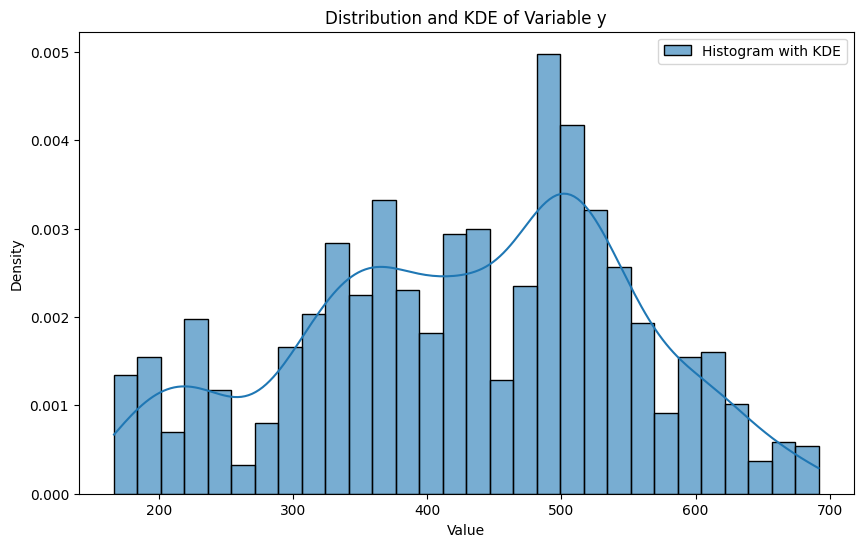

In [ ]:
y = df['Adj Close']
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, stat="density", bins=30, color="blue", alpha=0.6, label="Histogram with KDE")
plt.title("Distribution and KDE of Variable y")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
# Step 3: Calculate Daily Returns
daily_returns = y.pct_change().dropna()
daily_stats = daily_returns.describe()
print("\nSummary Statistics for Netflix Daily Returns:")
print(daily_stats)


Summary Statistics for Netflix Daily Returns:
Ticker         NFLX
count   1066.000000
mean       0.001046
std        0.030178
min       -0.351166
25%       -0.013449
50%        0.000756
75%        0.014333
max        0.168543


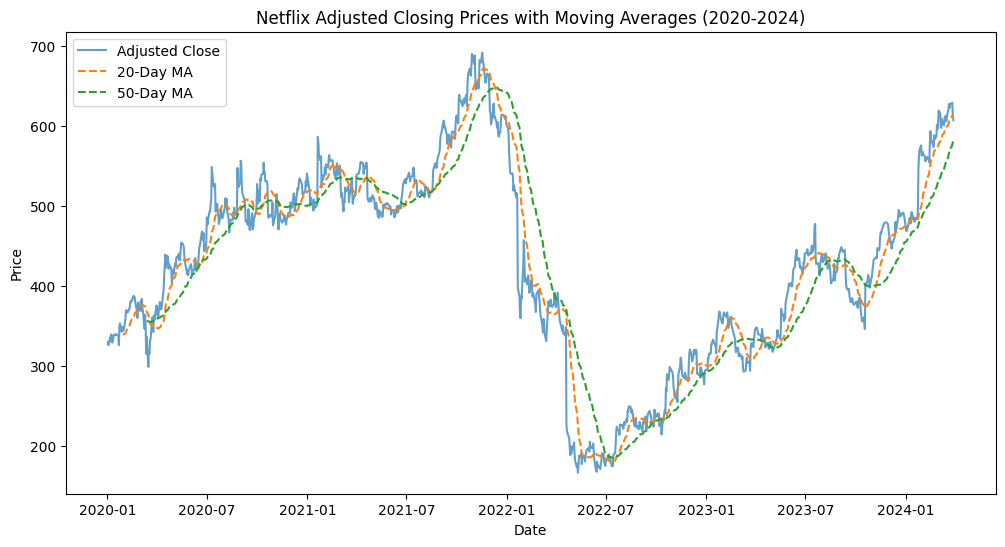

In [ ]:
# Moving Averages
adj_close_20D_MA = y.rolling(window=20).mean()
adj_close_50D_MA = y.rolling(window=50).mean()

# Step 4: Visualizations

# 1. Line Plot of Adjusted Close Prices with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(y, label='Adjusted Close', alpha=0.7)
plt.plot(adj_close_20D_MA, label='20-Day MA', linestyle='--')
plt.plot(adj_close_50D_MA, label='50-Day MA', linestyle='--')
plt.title('Netflix Adjusted Closing Prices with Moving Averages (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  4 of 4 completed


<Figure size 1400x800 with 0 Axes>

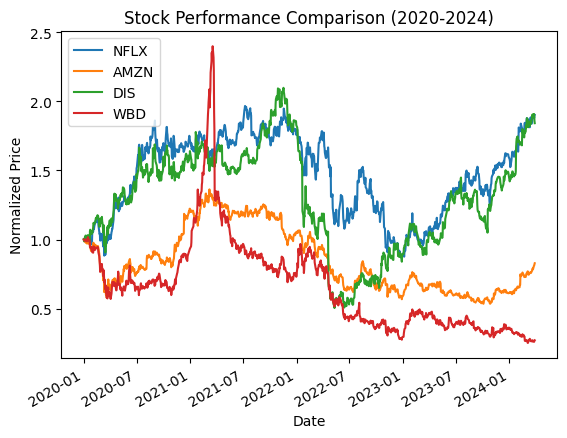

In [ ]:
# Step 5: Comparative Analysis with Competitors
competitors = ['NFLX', 'AMZN', 'DIS','WBD']
competitor_data = yf.download(competitors, start=start_date, end=end_date)['Adj Close']

# Normalize prices for comparison
normalized_data = competitor_data / competitor_data.iloc[0]

# Plot normalized stock prices
plt.figure(figsize=(14, 8))
normalized_data.plot()
plt.title('Stock Performance Comparison (2020-2024)')
plt.ylabel('Normalized Price')
plt.legend(competitors)
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
from fredapi import Fred

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2024-01-01'

# Step 1: Fetch Stock Data using yFinance
print("Fetching stock data...")
stock_data = yf.download('NFLX', start=start_date, end=end_date)  # Replace 'AAPL' with your ticker
stock_data['Return'] = stock_data['Adj Close'].pct_change()  # Calculate daily returns

# Add Technical Indicators
stock_data['20D_MA'] = stock_data['Adj Close'].rolling(window=20).mean()  # 20-day moving average
stock_data['50D_MA'] = stock_data['Adj Close'].rolling(window=50).mean()  # 50-day moving average
stock_data['Momentum'] = stock_data['20D_MA'] - stock_data['50D_MA']  # Momentum factor
stock_data['Volatility'] = stock_data['Return'].rolling(window=30).std()  # 30-day rolling volatility

# Resample Stock Data to Monthly Frequency
stock_data_resampled = stock_data.resample('ME').mean()

# Step 2: Fetch Macroeconomic Data from FRED
print("Fetching macroeconomic data...")
fred_api_key = 'ac9b1482dd0c5b8f38ac2c448eecf6e3'  # Replace with your FRED API key
fred = Fred(api_key=fred_api_key)

# Fetch GDP and Interest Rate data
gdp = fred.get_series('GDP', observation_start=start_date, observation_end=end_date)
interest_rate = fred.get_series('DFF', observation_start=start_date, observation_end=end_date)

# Convert to DataFrame and Resample to Monthly Frequency
gdp = gdp.resample('ME').ffill()  # Forward-fill missing values
interest_rate = interest_rate.resample('ME').ffill()
macro_data = pd.DataFrame({'GDP': gdp, 'Interest Rate': interest_rate})

# Step 3: Read ADS Index from Excel File
print("Reading ADS Index data from Excel file...")
ads_file_path = '/content/ADS_Index_Most_Current_Vintage (1).xlsx'  # Replace with your file path

# Read the data and parse dates
ads_data = pd.read_excel(ads_file_path)
ads_data['Date'] = pd.to_datetime(ads_data['Date'], format='%Y:%m:%d', errors='coerce')  # Parse custom date format
ads_data = ads_data.dropna(subset=['Date'])  # Drop rows with invalid dates
ads_data = ads_data.set_index('Date')  # Set 'Date' as the index

# Resample ADS data to Monthly Frequency and Add Features
ads_data = ads_data.loc[start_date:]  # Filter from start_date
ads_data = ads_data.resample('ME').mean()  # Resample to month-end frequency
ads_data['ADS_Lag1'] = ads_data['ADS_Index'].shift(1)  # Add lagged values
ads_data['ADS_Rolling'] = ads_data['ADS_Index'].rolling(window=3).mean()  # Add rolling averages

# Step 4: Read Fama-French Factors from CSV File
print("Reading Fama-French factors from CSV...")
ff_file_path = '/content/F-F_Research_Data_5_Factors_2x3 (1).csv'  # Replace with your file path

# Read the Fama-French CSV file
ff_factors = pd.read_csv(ff_file_path, skiprows=6, index_col=0)  # Adjust skiprows based on your file structure

# Convert the index to datetime using YYYYMM format
ff_factors.index = pd.to_datetime(ff_factors.index, format='%Y%m', errors='coerce')

# Drop rows with invalid dates (if any)
ff_factors = ff_factors[ff_factors.index.notnull()]

# Adjust column names based on actual file structure
# Add/remove names as per the file
ff_factors.columns = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

# Ensure all columns are numeric
ff_factors = ff_factors.apply(pd.to_numeric, errors='coerce')

# Step 5: Combine All Features
print("Combining all features into a single dataset...")
# Align data ranges
start_date_combined = max(
    stock_data_resampled.index.min(),
    macro_data.index.min(),
    ff_factors.index.min(),
    ads_data.index.min(),
)
end_date_combined = min(
    stock_data_resampled.index.max(),
    macro_data.index.max(),
    ff_factors.index.max(),
    ads_data.index.max(),
)

# Filter data to the aligned date range
stock_data_resampled = stock_data_resampled.loc[start_date_combined:end_date_combined]
macro_data = macro_data.loc[start_date_combined:end_date_combined]
ff_factors = ff_factors.loc[start_date_combined:end_date_combined]
ads_data = ads_data.loc[start_date_combined:end_date_combined]

# Merge all data
merged_data = pd.concat([stock_data_resampled, macro_data, ff_factors, ads_data], axis=1)

# Inspect merged data before handling missing values
print("Merged Data (Before Handling Missing Values):")
print(merged_data.head())

# Step 6: Handle Missing Values
print("Handling missing values...")
merged_data.fillna(method='ffill', inplace=True)  # Forward-fill missing values
merged_data.fillna(method='bfill', inplace=True)  # Backward-fill missing values

# Save the Feature Database
output_file = 'feature_database_cleaned.csv'
merged_data.to_csv(output_file)
print(f"Cleaned feature database saved as '{output_file}'.")


[*********************100%***********************]  1 of 1 completed

Fetching stock data...
Fetching macroeconomic data...


Reading ADS Index data from Excel file...
Reading Fama-French factors from CSV...
Combining all features into a single dataset...
Merged Data (Before Handling Missing Values):
            (Adj Close, NFLX)  (Close, NFLX)  (High, NFLX)  (Low, NFLX)  \
2020-01-31         338.832857     338.832857    343.255717   333.393332   
2020-02-01                NaN            NaN           NaN          NaN   
2020-02-29         373.988423     373.988423    379.482104   367.611052   
2020-03-01                NaN            NaN           NaN          NaN   
2020-03-31         350.587271     350.587271    361.854999   339.373187   

            (Open, NFLX)  (Volume, NFLX)  (Return, )  (20D_MA, )  (50D_MA, )  \
2020-01-31    338.040000    8.089238e+06    0.002549  338.902000         NaN   
2020-02-01           NaN             NaN         NaN         NaN         NaN   
2020-02-29    372.127366    6.002947e+06    0.003744  357.535501         NaN   
2020-03-01           NaN             NaN         NaN 

<ipython-input-13-cfecec7db0d7>:104: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)  # Forward-fill missing values
<ipython-input-13-cfecec7db0d7>:105: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='bfill', inplace=True)  # Backward-fill missing values


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2020-01-31 to 2023-12-31
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NFLX)  95 non-null     float64
 1   (Close, NFLX)      95 non-null     float64
 2   (High, NFLX)       95 non-null     float64
 3   (Low, NFLX)        95 non-null     float64
 4   (Open, NFLX)       95 non-null     float64
 5   (Volume, NFLX)     95 non-null     float64
 6   (Return, )         95 non-null     float64
 7   (20D_MA, )         95 non-null     float64
 8   (50D_MA, )         95 non-null     float64
 9   (Momentum, )       95 non-null     float64
 10  (Volatility, )     95 non-null     float64
 11  GDP                95 non-null     float64
 12  Interest Rate      95 non-null     float64
 13  Mkt-RF             95 non-null     float64
 14  SMB                95 non-null     float64
 15  HML                95 non-null     float64
 16  RMW     

In [ ]:
merged_data

,"(Adj Close, NFLX)","(Close, NFLX)","(High, NFLX)","(Low, NFLX)","(Open, NFLX)","(Volume, NFLX)","(Return, )","(20D_MA, )","(50D_MA, )","(Momentum, )",...,Interest Rate,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,ADS_Lag1,ADS_Rolling
2020-01-31,338.832857,338.832857,343.255717,333.393332,338.040000,8.089238e+06,0.002549,338.902000,356.064077,-2.238156,...,1.59,-8.13,0.04,-3.80,-1.49,-2.52,0.12,-0.113332,-0.113332,-5.157236
2020-02-01,338.832857,338.832857,343.255717,333.393332,338.040000,8.089238e+06,0.002549,338.902000,356.064077,-2.238156,...,1.59,-8.13,0.04,-3.80,-1.49,-2.52,0.12,-0.113332,-0.113332,-5.157236
2020-02-29,373.988423,373.988423,379.482104,367.611052,372.127366,6.002947e+06,0.003744,357.535501,356.064077,-2.238156,...,1.58,-8.13,0.04,-3.80,-1.49,-2.52,0.12,-0.919442,-0.113332,-5.157236
2020-03-01,373.988423,373.988423,379.482104,367.611052,372.127366,6.002947e+06,0.003744,357.535501,356.064077,-2.238156,...,1.58,-13.39,-8.24,-13.88,-1.56,1.26,0.13,-0.919442,-0.113332,-5.157236
2020-03-31,350.587271,350.587271,361.854999,339.373187,349.618634,9.180868e+06,0.002199,362.228067,356.064077,-2.238156,...,0.08,-13.39,-8.24,-13.88,-1.56,1.26,0.13,-14.438935,-0.919442,-5.157236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,384.119091,384.119091,390.844546,379.389544,385.145000,7.455541e+06,0.004596,383.361521,405.955154,-22.593633,...,5.33,-3.18,-4.05,0.19,2.47,-0.67,0.47,-0.357228,-0.013428,-0.105739
2023-11-01,384.119091,384.119091,390.844546,379.389544,385.145000,7.455541e+06,0.004596,383.361521,405.955154,-22.593633,...,5.33,8.83,-0.11,1.66,-3.81,-0.99,0.44,-0.357228,-0.013428,-0.105739
2023-11-30,455.715713,455.715713,458.088572,450.887621,453.711904,3.416257e+06,0.006785,421.680521,403.655017,18.025504,...,5.33,8.83,-0.11,1.66,-3.81,-0.99,0.44,0.008778,-0.357228,-0.120626
2023-12-01,455.715713,455.715713,458.088572,450.887621,453.711904,3.416257e+06,0.006785,421.680521,403.655017,18.025504,...,5.33,4.87,7.33,4.92,-3.04,1.30,0.43,0.008778,-0.357228,-0.120626


Cleaned Columns in the DataFrame:
Index(['Adj Close_NFLX', 'Close_NFLX', 'High_NFLX', 'Low_NFLX', 'Open_NFLX',
       'Volume_NFLX', 'Return_', '20D_MA_', '50D_MA_', 'Momentum_',
       'Volatility_', 'GDP', 'Interest Rate', 'Mkt-RF', 'SMB', 'HML', 'RMW',
       'CMA', 'RF', 'ADS_Index', 'ADS_Lag1', 'ADS_Rolling'],
      dtype='object')

Ridge Regression Feature Importance:
            Feature  Importance
0   Adj Close_NFLX    0.003939
1       Close_NFLX    0.003939
2        High_NFLX    0.002811
3         Low_NFLX    0.003277
4        Open_NFLX    0.002082
5      Volume_NFLX   -0.000811
6          20D_MA_   -0.009212
7          50D_MA_   -0.008467
8        Momentum_   -0.002292
9      Volatility_    0.000182
10             GDP   -0.001489
11   Interest Rate    0.000127
12          Mkt-RF    0.001479
13             SMB   -0.000261
14             HML    0.000030
15             RMW   -0.000118
16             CMA    0.000134
17              RF    0.000898
18       ADS_Index    0.000161
19

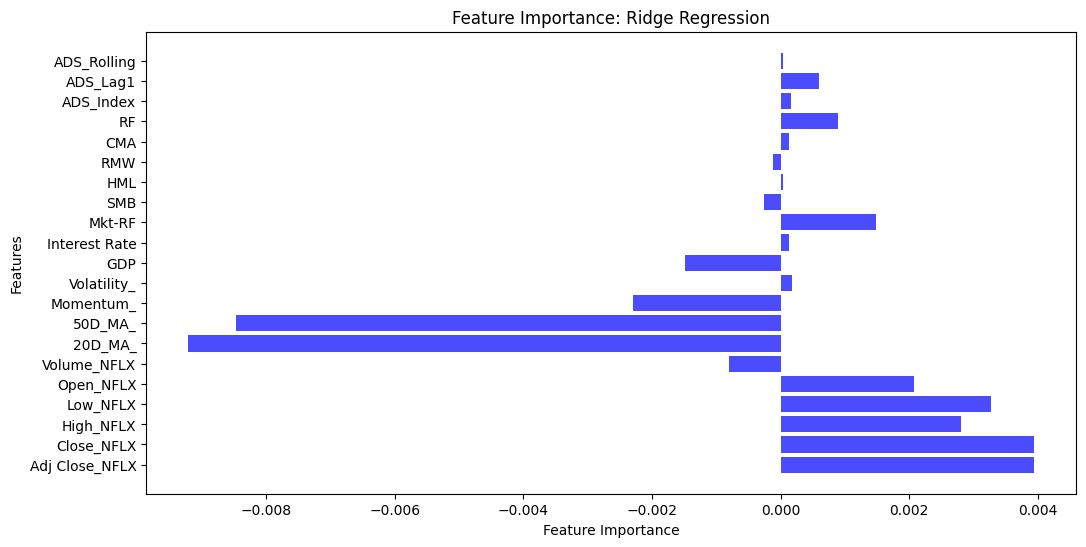


Random Forest Feature Importance:
            Feature  Importance
0      Volume_NFLX    0.489274
1          50D_MA_    0.078758
2              CMA    0.069685
3        ADS_Index    0.060063
4           Mkt-RF    0.053469
5        Momentum_    0.048792
6         ADS_Lag1    0.036957
7          20D_MA_    0.023769
8      Volatility_    0.020461
9              HML    0.014959
10     ADS_Rolling    0.014912
11             GDP    0.014355
12   Interest Rate    0.013613
13             RMW    0.010661
14  Adj Close_NFLX    0.009923
15      Close_NFLX    0.008720
16        Low_NFLX    0.007152
17             SMB    0.006678
18       Open_NFLX    0.006376
19              RF    0.006087
20       High_NFLX    0.005333


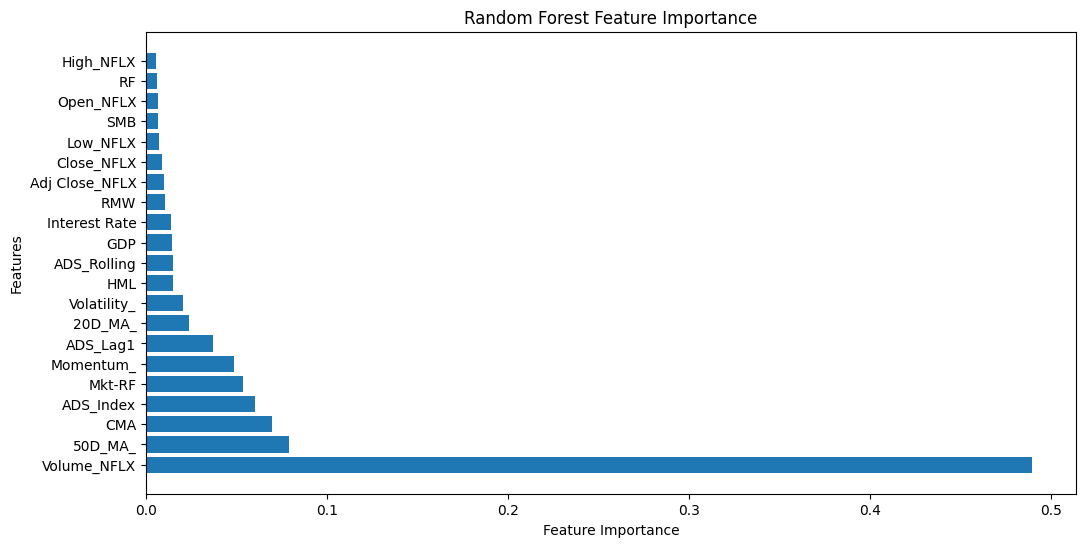


XGBoost Feature Importance:
            Feature  Importance
0      Volume_NFLX    0.211820
1          50D_MA_    0.115375
2        Momentum_    0.097849
3      ADS_Rolling    0.094887
4        ADS_Index    0.070750
5         Low_NFLX    0.069776
6          20D_MA_    0.066972
7              RMW    0.052624
8              GDP    0.049302
9           Mkt-RF    0.043419
10             HML    0.034380
11        ADS_Lag1    0.026112
12  Adj Close_NFLX    0.024128
13     Volatility_    0.022339
14             SMB    0.010280
15             CMA    0.009987
16              RF    0.000000
17   Interest Rate    0.000000
18       Open_NFLX    0.000000
19       High_NFLX    0.000000
20      Close_NFLX    0.000000


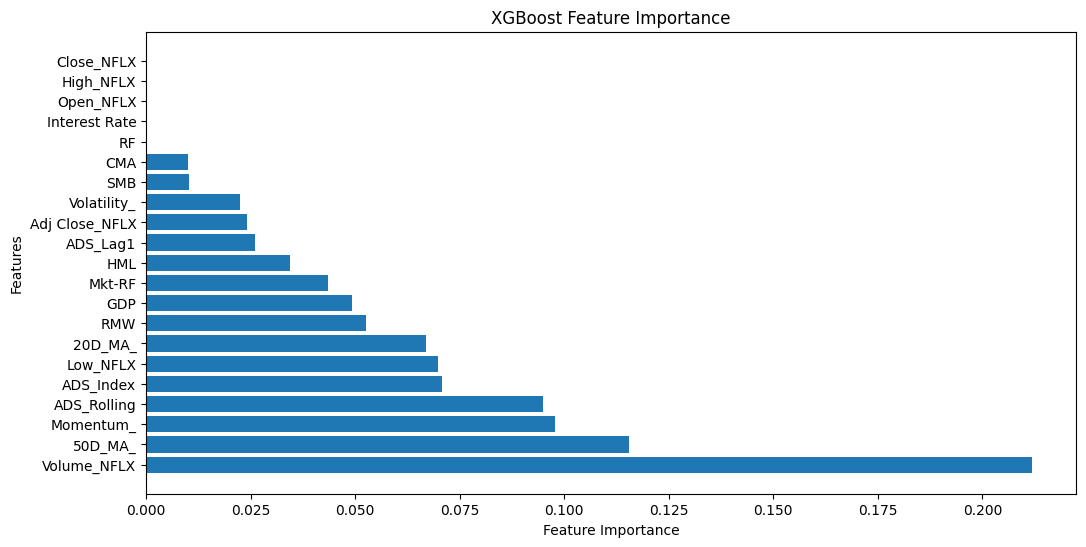

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Feature Database
data = pd.read_csv('feature_database_cleaned.csv', index_col=0)

# Clean column names
data.columns = (
    data.columns.str.replace("[()']", '', regex=True)
    .str.replace(", ", '_', regex=False)
    .str.strip()
)

# Debug: Print cleaned column names
print("Cleaned Columns in the DataFrame:")
print(data.columns)

# Step 2: Define Features (X) and Target Variable (y)
target_column = 'Return_'  # Adjust based on the cleaned column names
X = data.drop(columns=[target_column])  # Drop the target column
y = data[target_column]  # Target variable

# Step 3: Preprocess the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Ridge Regression Feature Selection
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Ridge Feature Importance
ridge_importances = ridge.coef_
ridge_features = X.columns
ridge_importance_df = pd.DataFrame({'Feature': ridge_features, 'Importance': ridge_importances})
print("\nRidge Regression Feature Importance:\n", ridge_importance_df)

# Plot Ridge Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(ridge_features, ridge_importances, color='blue', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance: Ridge Regression')
plt.show()

# Step 7: Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Random Forest Feature Importance
rf_importances = rf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
rf_features = [X.columns[i] for i in rf_indices]
rf_importance_values = rf_importances[rf_indices]
rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_importance_values})
print("\nRandom Forest Feature Importance:\n", rf_importance_df)

# Visualize Random Forest Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(range(X.shape[1]), rf_importances[rf_indices], align='center')
plt.yticks(range(X.shape[1]), rf_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Step 8: XGBoost Feature Importance
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# XGBoost Feature Importance
xgb_importances = xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]
xgb_features = [X.columns[i] for i in xgb_indices]
xgb_importance_values = xgb_importances[xgb_indices]
xgb_importance_df = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_importance_values})
print("\nXGBoost Feature Importance:\n", xgb_importance_df)

# Plot XGBoost Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(xgb_importances)), xgb_importances[xgb_indices], align='center')
plt.yticks(range(len(xgb_importances)), xgb_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Load the cleaned data
data = pd.read_csv('feature_database_cleaned.csv', index_col=0)

# Clean column names
data.columns = (
    data.columns.str.replace("[()']", '', regex=True)
    .str.replace(", ", '_', regex=False)
    .str.strip()
)

# Features and target
X = data.drop(columns=['Return_'])  # Replace 'Return_' with your target column
y = data['Return_']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "LASSO Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Append results
    results.append({
        "Model": name,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)

# Save results to a CSV
results_df.to_csv('model_comparison_results.csv', index=False)


Model Comparison:
               Model  Train RMSE  Test RMSE  R2 Train   R2 Test
0  Linear Regression    0.003089   0.004099  0.737663  0.742793
1   Ridge Regression    0.003149   0.004285  0.727230  0.718857
2   LASSO Regression    0.004040   0.005095  0.551143  0.602502
3      Random Forest    0.001928   0.005436  0.897738  0.547457
4            XGBoost    0.000464   0.003481  0.994081  0.814509


In [30]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 27.6 MB/s eta 0:00:00


In [32]:
from arch import arch_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Step 1: Load Data
data = pd.read_csv('feature_database_cleaned.csv', index_col=0)
# Clean column names
data.columns = (
    data.columns.str.replace("[()']", '', regex=True)
    .str.replace(", ", '_', regex=False)
    .str.strip()
)
returns = data['Return_']

# Step 2: Fit a GARCH Model
print("Fitting GARCH Model...")
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
print(garch_fit.summary())

# Step 3: Forecast Volatility
forecasts = garch_fit.forecast(horizon=1, start=0)
volatility_forecast = forecasts.variance.iloc[:, 0]

# Step 4: Evaluate GARCH Predictions
garch_rmse = np.sqrt(mean_squared_error(returns[1:], np.sqrt(volatility_forecast[1:])))
print(f"GARCH RMSE: {garch_rmse:.4f}")

Fitting GARCH Model...
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Return_   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                369.133
Distribution:                  Normal   AIC:                          -730.266
Method:            Maximum Likelihood   BIC:                          -720.051
                                        No. Observations:                   95
Date:                Fri, Dec 06 2024   Df Residuals:                       94
Time:                        07:41:39   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.8283e-03  2.599e-07   

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.221e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [34]:
!pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 9.5 MB/s eta 0:00:00


Kalman Filter RMSE: 0.0058


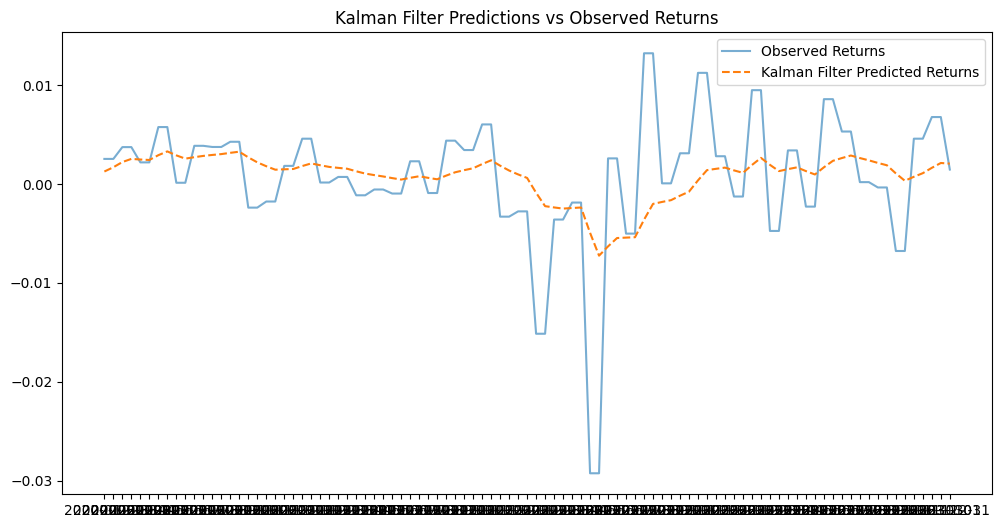

In [36]:
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare Data
returns = data['Return_']

# Step 2: Initialize Kalman Filter
kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=0,
    initial_state_covariance=1,
    observation_covariance=1,
    transition_covariance=0.01
)

# Step 3: Fit Kalman Filter
state_means, state_covariances = kf.filter(returns)

# Predict the next state using the last filtered state
state_means_pred, state_cov_pred = kf.filter_update(
    filtered_state_mean=state_means[-1],
    filtered_state_covariance=state_covariances[-1],
    observation=returns.iloc[-1]
)

# Step 4: Evaluate Predictions
kalman_rmse = np.sqrt(mean_squared_error(returns, state_means))
print(f"Kalman Filter RMSE: {kalman_rmse:.4f}")

# Plot Kalman Filter Predictions vs Observed Returns
plt.figure(figsize=(12, 6))
plt.plot(returns, label='Observed Returns', alpha=0.6)
plt.plot(state_means, label='Kalman Filter Predicted Returns', linestyle='--')
plt.legend()
plt.title('Kalman Filter Predictions vs Observed Returns')
plt.show()

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from arch import arch_model
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('feature_database_cleaned.csv', index_col=0)

# Clean column names
data.columns = (
    data.columns.str.replace("[()']", '', regex=True)
    .str.replace(", ", '_', regex=False)
    .str.strip()
)

# Features and target
X = data.drop(columns=['Return_'])  # Replace 'Return_' with your target column
y = data['Return_']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define traditional models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "LASSO Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train and evaluate each model
results = []
rf_rmse_test, xgb_rmse_test = None, None  # Initialize for benchmarking

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Append results
    results.append({
        "Model": name,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    })

    # Save RMSE for Random Forest and XGBoost for benchmarking
    if name == "Random Forest":
        rf_rmse_test = test_rmse
    if name == "XGBoost":
        xgb_rmse_test = test_rmse

# Step 1: GARCH Model
print("Fitting GARCH Model...")
returns = data['Return_']
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
forecasts = garch_fit.forecast(horizon=1, start=0)
volatility_forecast = forecasts.variance.iloc[:, 0]
garch_rmse = np.sqrt(mean_squared_error(returns[1:], np.sqrt(volatility_forecast[1:])))
print(f"GARCH RMSE: {garch_rmse:.4f}")

# Step 2: Kalman Filter
print("Fitting Kalman Filter...")
kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=0,
    initial_state_covariance=1,
    observation_covariance=1,
    transition_covariance=0.01
)
state_means, state_covariances = kf.filter(returns)
kalman_rmse = np.sqrt(mean_squared_error(returns, state_means))
print(f"Kalman Filter RMSE: {kalman_rmse:.4f}")

# Step 3: Consolidate Results
benchmark_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "GARCH", "Kalman Filter"],
    "RMSE": [rf_rmse_test, xgb_rmse_test, garch_rmse, kalman_rmse]
})

print("Benchmark Model Comparison:")
print(benchmark_results)

# Save results to CSV
benchmark_results.to_csv('benchmark_model_comparison.csv', index=False)


Fitting GARCH Model...
GARCH RMSE: 0.0098
Fitting Kalman Filter...
Kalman Filter RMSE: 0.0058
Benchmark Model Comparison:
           Model      RMSE
0  Random Forest  0.005436
1        XGBoost  0.003481
2          GARCH  0.009759
3  Kalman Filter  0.005803


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.221e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [45]:
# Feature Engineering
# Rolling Mean
data['Rolling_Mean_20'] = data['Return_'].rolling(window=20).mean()
data['Rolling_Mean_50'] = data['Return_'].rolling(window=50).mean()

# Rolling Standard Deviation
data['Rolling_Std_20'] = data['Return_'].rolling(window=20).std()
data['Rolling_Std_50'] = data['Return_'].rolling(window=50).std()

# Momentum
data['Momentum_10'] = data['Return_'] - data['Return_'].shift(10)

# Exponential Moving Average (EMA)
data['EMA_20'] = data['Return_'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Return_'].ewm(span=50, adjust=False).mean()

# RSI
window = 14
delta = data['Return_'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Cumulative Returns
data['Cumulative_Returns'] = (1 + data['Return_']).cumprod()

# Lag Features
data['Return_Lag_1'] = data['Return_'].shift(1)
data['Return_Lag_5'] = data['Return_'].shift(5)

# Drop rows with NaN (caused by rolling or shifting)
data = data.dropna()

# Debug: Show the dataset with new features
print(data.head())

            Adj Close_NFLX  Close_NFLX   High_NFLX    Low_NFLX   Open_NFLX  \
2022-02-01      487.853500  487.853500  498.946999  478.275999  492.055000   
2022-02-28      400.986317  400.986317  409.699474  391.066316  400.777366   
2022-03-01      400.986317  400.986317  409.699474  391.066316  400.777366   
2022-03-31      366.791741  366.791741  374.962608  360.383912  369.220003   
2022-04-01      366.791741  366.791741  374.962608  360.383912  369.220003   

             Volume_NFLX   Return_     20D_MA_     50D_MA_  Momentum_  ...  \
2022-02-01  1.208310e+07 -0.015140  564.868950  612.081180 -47.212231  ...   
2022-02-28  7.947932e+06 -0.003586  426.698871  521.326369 -94.627498  ...   
2022-03-01  7.947932e+06 -0.003586  426.698871  521.326369 -94.627498  ...   
2022-03-31  5.195300e+06 -0.001867  375.281805  425.907949 -50.626144  ...   
2022-04-01  5.195300e+06 -0.001867  375.281805  425.907949 -50.626144  ...   

            Rolling_Mean_50  Rolling_Std_20  Rolling_Std_50  M


Ridge Regression Feature Importance:
                Feature  Importance
0       Adj Close_NFLX   -0.000150
1           Close_NFLX   -0.000150
2            High_NFLX   -0.000281
3             Low_NFLX   -0.000306
4            Open_NFLX   -0.000532
5          Volume_NFLX   -0.000136
6              20D_MA_   -0.002951
7              50D_MA_   -0.001906
8            Momentum_   -0.002388
9          Volatility_   -0.000107
10                 GDP    0.000813
11       Interest Rate    0.000580
12              Mkt-RF    0.001614
13                 SMB    0.000645
14                 HML    0.000176
15                 RMW   -0.000405
16                 CMA   -0.000486
17                  RF   -0.002740
18           ADS_Index    0.000673
19            ADS_Lag1    0.000659
20         ADS_Rolling   -0.000348
21     Rolling_Mean_20   -0.001529
22     Rolling_Mean_50    0.002255
23      Rolling_Std_20   -0.000763
24      Rolling_Std_50    0.001870
25         Momentum_10    0.001991
26              

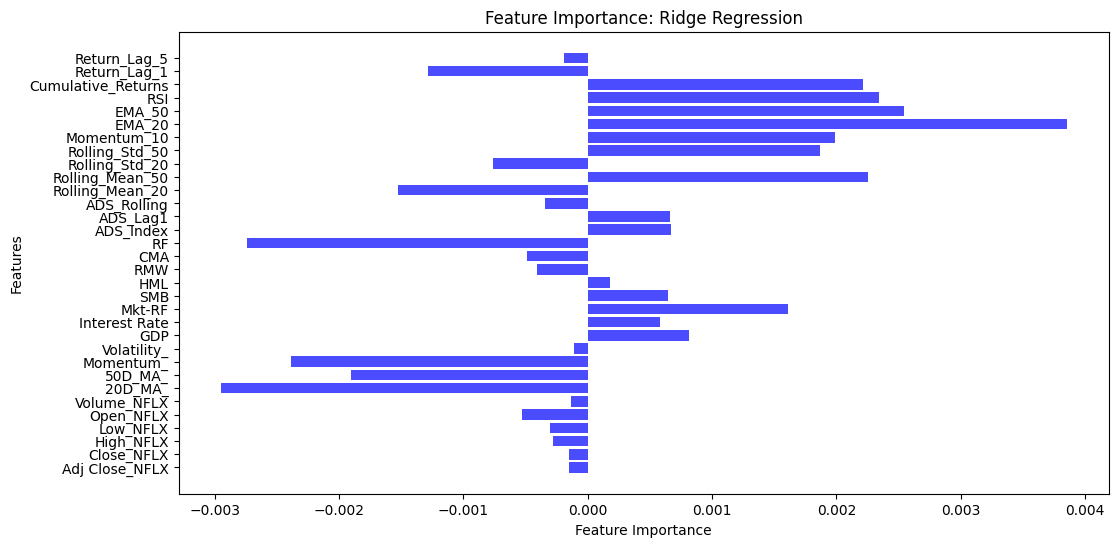


Random Forest Feature Importance:
                Feature  Importance
0          Momentum_10    0.315229
1                  RSI    0.300326
2          Volume_NFLX    0.113107
3       Rolling_Std_50    0.034778
4            Momentum_    0.024120
5       Rolling_Std_20    0.021943
6         Return_Lag_1    0.019793
7               Mkt-RF    0.018354
8               EMA_50    0.015613
9               EMA_20    0.014623
10                  RF    0.012277
11            ADS_Lag1    0.010906
12       Interest Rate    0.009390
13           ADS_Index    0.009159
14         ADS_Rolling    0.009082
15     Rolling_Mean_50    0.008867
16                 GDP    0.006459
17                 SMB    0.006341
18         Volatility_    0.005668
19             20D_MA_    0.005157
20     Rolling_Mean_20    0.005134
21                 HML    0.004467
22        Return_Lag_5    0.004349
23           Open_NFLX    0.004243
24  Cumulative_Returns    0.003440
25                 CMA    0.003306
26            Low_N

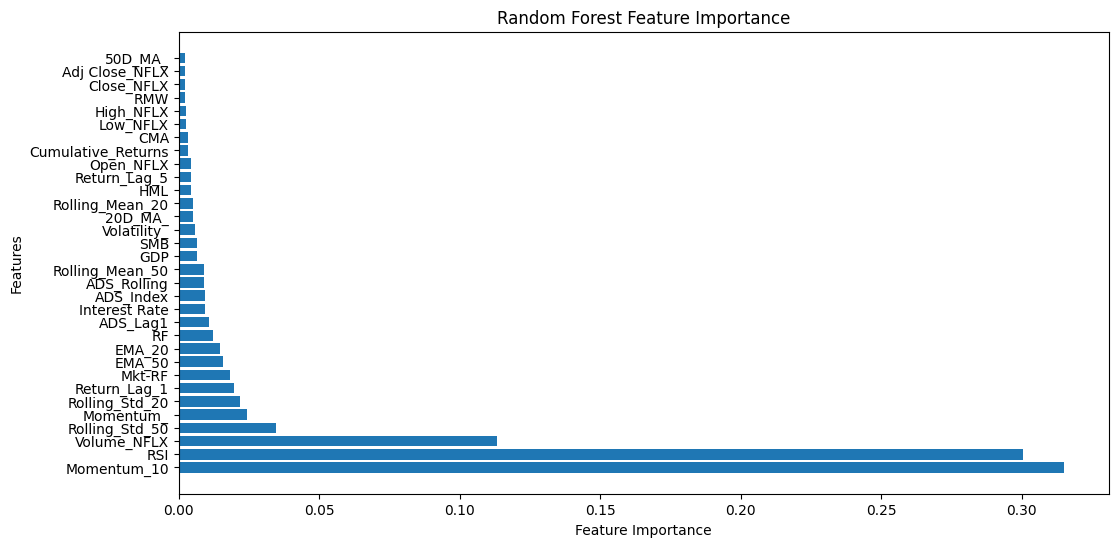


XGBoost Feature Importance:
                Feature  Importance
0          Momentum_10    0.517417
1                  RSI    0.101664
2               Mkt-RF    0.063770
3               EMA_20    0.059860
4      Rolling_Mean_20    0.046906
5          Volatility_    0.043011
6          Volume_NFLX    0.031005
7               EMA_50    0.027128
8             ADS_Lag1    0.025012
9            ADS_Index    0.022195
10            Low_NFLX    0.019300
11      Adj Close_NFLX    0.018752
12                 SMB    0.007924
13           Momentum_    0.006768
14         ADS_Rolling    0.004420
15             20D_MA_    0.002566
16        Return_Lag_1    0.002301
17                 CMA    0.000000
18     Rolling_Mean_50    0.000000
19                  RF    0.000000
20  Cumulative_Returns    0.000000
21        Return_Lag_5    0.000000
22      Rolling_Std_50    0.000000
23      Rolling_Std_20    0.000000
24       Interest Rate    0.000000
25                 GDP    0.000000
26                 HML   

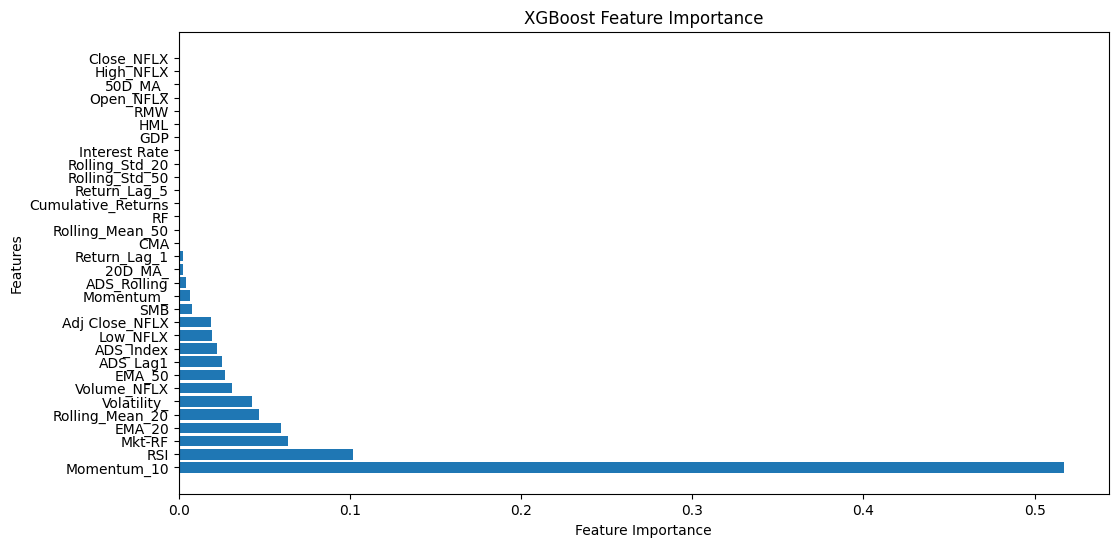

In [46]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define Features (X) and Target Variable (y)
target_column = 'Return_'  # Adjust based on the cleaned column names
X = data.drop(columns=[target_column])  # Drop the target column
y = data[target_column]  # Target variable

# Step 3: Preprocess the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Ridge Regression Feature Selection
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Ridge Feature Importance
ridge_importances = ridge.coef_
ridge_features = X.columns
ridge_importance_df = pd.DataFrame({'Feature': ridge_features, 'Importance': ridge_importances})
print("\nRidge Regression Feature Importance:\n", ridge_importance_df)

# Plot Ridge Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(ridge_features, ridge_importances, color='blue', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance: Ridge Regression')
plt.show()

# Step 7: Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Random Forest Feature Importance
rf_importances = rf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
rf_features = [X.columns[i] for i in rf_indices]
rf_importance_values = rf_importances[rf_indices]
rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_importance_values})
print("\nRandom Forest Feature Importance:\n", rf_importance_df)

# Visualize Random Forest Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(range(X.shape[1]), rf_importances[rf_indices], align='center')
plt.yticks(range(X.shape[1]), rf_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Step 8: XGBoost Feature Importance
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# XGBoost Feature Importance
xgb_importances = xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]
xgb_features = [X.columns[i] for i in xgb_indices]
xgb_importance_values = xgb_importances[xgb_indices]
xgb_importance_df = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_importance_values})
print("\nXGBoost Feature Importance:\n", xgb_importance_df)

# Plot XGBoost Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(xgb_importances)), xgb_importances[xgb_indices], align='center')
plt.yticks(range(len(xgb_importances)), xgb_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Features and target
X = data.drop(columns=['Return_'])  # Replace 'Return_' with your target column
y = data['Return_']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "LASSO Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
}

# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Append results
    results.append({
        "Model": name,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)

# Save results to a CSV
results_df.to_csv('model_comparison_results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.435e-05, tolerance: 3.021e-07
  model = cd_fast.enet_coordinate_descent(


Model Comparison:
               Model  Train RMSE  Test RMSE  R2 Train   R2 Test
0  Linear Regression    0.001217   0.010201  0.982351 -2.048459
1   Ridge Regression    0.002717   0.005358  0.912032  0.159028
2   LASSO Regression    0.004636   0.004265  0.743968  0.467206
3      Random Forest    0.001881   0.004063  0.957842  0.516434
4            XGBoost    0.000407   0.003330  0.998023  0.675174


Kalman Filter RMSE: 0.0074


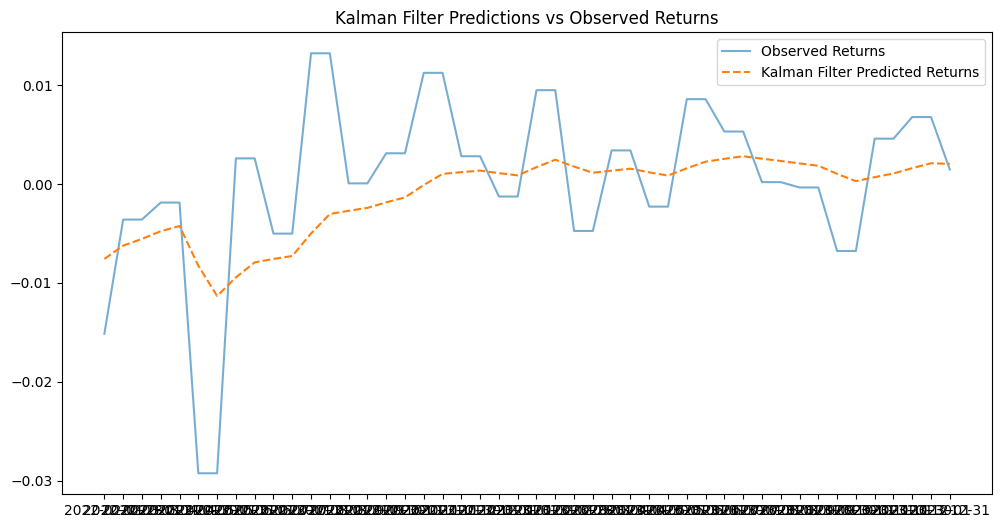

In [48]:
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare Data
returns = data['Return_']

# Step 2: Initialize Kalman Filter
kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=0,
    initial_state_covariance=1,
    observation_covariance=1,
    transition_covariance=0.01
)

# Step 3: Fit Kalman Filter
state_means, state_covariances = kf.filter(returns)

# Predict the next state using the last filtered state
state_means_pred, state_cov_pred = kf.filter_update(
    filtered_state_mean=state_means[-1],
    filtered_state_covariance=state_covariances[-1],
    observation=returns.iloc[-1]
)

# Step 4: Evaluate Predictions
kalman_rmse = np.sqrt(mean_squared_error(returns, state_means))
print(f"Kalman Filter RMSE: {kalman_rmse:.4f}")

# Plot Kalman Filter Predictions vs Observed Returns
plt.figure(figsize=(12, 6))
plt.plot(returns, label='Observed Returns', alpha=0.6)
plt.plot(state_means, label='Kalman Filter Predicted Returns', linestyle='--')
plt.legend()
plt.title('Kalman Filter Predictions vs Observed Returns')
plt.show()